# Getting the minimumwage for Europian Union countries

## Loading the libraries and dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('estat_tps00155.tsv', sep='\t')

In [3]:
df.head()

,"freq,currency,geo\TIME_PERIOD",2020-S1,2020-S2,2021-S1,2021-S2,2022-S1,2022-S2,2023-S1,2023-S2,2024-S1,2024-S2,2025-S1,2025-S2
0,"S,EUR,AL",213,209,243,245,248,269,298,376,385,399,408,408
1,"S,EUR,AT",: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m
2,"S,EUR,BE",1594,1626,1626,1626,1658,1842,1955,1955,1994,2070,2070,2112
3,"S,EUR,BG",312,312,332,332,332,363,399,399,477,477,551,551
4,"S,EUR,CH",: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m


In [4]:
# Split the first column into separate columns
df[['freq', 'currency', 'geo']] = df['freq,currency,geo\\TIME_PERIOD'].str.split(',', expand=True)

# Now you have a new 'geo' column with just the country code
df.head()

,"freq,currency,geo\TIME_PERIOD",2020-S1,2020-S2,2021-S1,2021-S2,2022-S1,2022-S2,2023-S1,2023-S2,2024-S1,2024-S2,2025-S1,2025-S2,freq,currency,geo
0,"S,EUR,AL",213,209,243,245,248,269,298,376,385,399,408,408,S,EUR,AL
1,"S,EUR,AT",: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,S,EUR,AT
2,"S,EUR,BE",1594,1626,1626,1626,1658,1842,1955,1955,1994,2070,2070,2112,S,EUR,BE
3,"S,EUR,BG",312,312,332,332,332,363,399,399,477,477,551,551,S,EUR,BG
4,"S,EUR,CH",: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,S,EUR,CH


In [5]:
# Drop the first column
df = df.drop(columns=['freq,currency,geo\\TIME_PERIOD'])

# Move 'geo' to the first column
cols = ['geo'] + [col for col in df.columns if col != 'geo']
df = df[cols]

df.head()

,geo,2020-S1,2020-S2,2021-S1,2021-S2,2022-S1,2022-S2,2023-S1,2023-S2,2024-S1,2024-S2,2025-S1,2025-S2,freq,currency
0,AL,213,209,243,245,248,269,298,376,385,399,408,408,S,EUR
1,AT,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,S,EUR
2,BE,1594,1626,1626,1626,1658,1842,1955,1955,1994,2070,2070,2112,S,EUR
3,BG,312,312,332,332,332,363,399,399,477,477,551,551,S,EUR
4,CH,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,: m,S,EUR


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   geo       39 non-null     object
 1   2020-S1   39 non-null     object
 2   2020-S2   39 non-null     object
 3   2021-S1   39 non-null     object
 4   2021-S2   39 non-null     object
 5   2022-S1   39 non-null     object
 6   2022-S2   39 non-null     object
 7   2023-S1   39 non-null     object
 8   2023-S2   39 non-null     object
 9   2024-S1   39 non-null     object
 10  2024-S2   39 non-null     object
 11  2025-S1   39 non-null     object
 12  2025-S2   39 non-null     object
 13  freq      39 non-null     object
 14  currency  39 non-null     object
dtypes: object(15)
memory usage: 4.7+ KB


In [8]:
df['2020-S1 ']

0      213 
1       : m
2     1594 
3      312 
4       : m
5       : m
6      575 
7     1544 
8       : m
9      584 
10     758 
11    1108 
12      : m
13    1539 
14     546 
15     487 
16    1656 
17      : m
18      : m
19     607 
20    2142 
21     430 
22      52 
23     331 
24     342 
25     777 
26    1654 
27      : m
28     611 
29     741 
30     466 
31     344 
32      : m
33     941 
34     580 
35     440 
36     183 
37    1599 
38    1119 
Name: 2020-S1 , dtype: object

In [9]:
# Create a new dataset with geo and 2025-S1, 2025-S2 columns
df_2025 = df[['geo', '2025-S1 ', '2025-S2 ']]

df_2025.head()

,geo,2025-S1,2025-S2
0,AL,408,408
1,AT,: m,: m
2,BE,2070,2112
3,BG,551,551
4,CH,: m,: m


In [10]:
# Remove trailing spaces from column names if needed
df_2025.columns = df_2025.columns.str.strip()

# Add 2025-S1 and 2025-S2 to get the yearly wage
df_2025['2025'] = pd.to_numeric(df_2025['2025-S1'], errors='coerce') + pd.to_numeric(df_2025['2025-S2'], errors='coerce')

df_2025.head()

/var/folders/88/t4qwcm1n44z0_870pr_ryj7w0000gn/T/ipykernel_20623/3917599497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['2025'] = pd.to_numeric(df_2025['2025-S1'], errors='coerce') + pd.to_numeric(df_2025['2025-S2'], errors='coerce')


,geo,2025-S1,2025-S2,2025
0,AL,408,408,816.0
1,AT,: m,: m,NaN
2,BE,2070,2112,4182.0
3,BG,551,551,1102.0
4,CH,: m,: m,NaN


In [12]:
# Replace ': m' and ':' with NaN in the entire DataFrame
df_2025.replace({': m': pd.NA, ':': pd.NA}, inplace=True)

df_2025 = df_2025.dropna()

/var/folders/88/t4qwcm1n44z0_870pr_ryj7w0000gn/T/ipykernel_20623/2406449315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025.replace({': m': pd.NA, ':': pd.NA}, inplace=True)


In [13]:
df_2025.head()

,geo,2025-S1,2025-S2,2025
0,AL,408,408,816.0
2,BE,2070,2112,4182.0
3,BG,551,551,1102.0
5,CY,1000,1000,2000.0
6,CZ,826,841,1667.0


In [14]:
# Calculate monthly and daily wage
df_2025['monthly_wage'] = df_2025['2025'] / 12
df_2025['daily_wage'] = df_2025['2025'] / 365  # More accurate than dividing by 30

df_2025.head()

,geo,2025-S1,2025-S2,2025,monthly_wage,daily_wage
0,AL,408,408,816.0,68.000000,2.235616
2,BE,2070,2112,4182.0,348.500000,11.457534
3,BG,551,551,1102.0,91.833333,3.019178
5,CY,1000,1000,2000.0,166.666667,5.479452
6,CZ,826,841,1667.0,138.916667,4.567123


/var/folders/88/t4qwcm1n44z0_870pr_ryj7w0000gn/T/ipykernel_20623/3180513375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2025, x='geo', y='monthly_wage', palette='viridis')


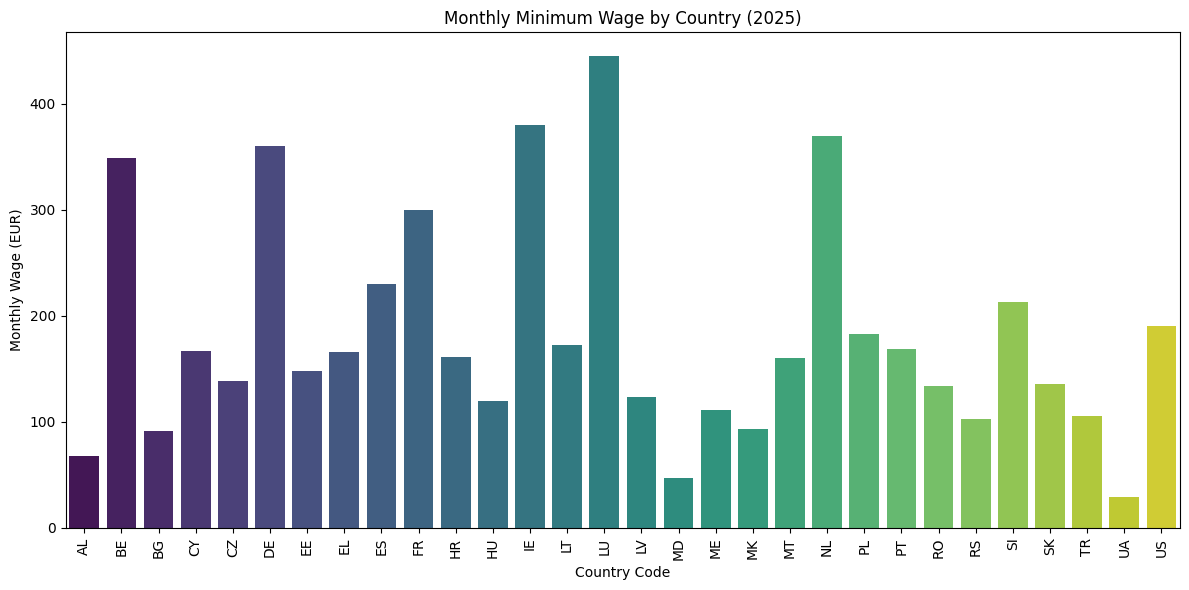

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_2025, x='geo', y='monthly_wage', palette='viridis')
plt.xticks(rotation=90)
plt.title('Monthly Minimum Wage by Country (2025)')
plt.xlabel('Country Code')
plt.ylabel('Monthly Wage (EUR)')
plt.tight_layout()
plt.show()

In [18]:
country_map = {
    'AL': 'Albania', 'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CH': 'Switzerland',
    'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EE': 'Estonia',
    'EL': 'Greece', 'ES': 'Spain', 'FI': 'Finland', 'FR': 'France', 'HR': 'Croatia',
    'HU': 'Hungary', 'IE': 'Ireland', 'IS': 'Iceland', 'IT': 'Italy', 'LT': 'Lithuania',
    'LU': 'Luxembourg', 'LV': 'Latvia', 'MD': 'Moldova', 'ME': 'Montenegro', 'MK': 'North Macedonia',
    'MT': 'Malta', 'NL': 'Netherlands', 'NO': 'Norway', 'PL': 'Poland', 'PT': 'Portugal',
    'RO': 'Romania', 'RS': 'Serbia'
}

df_2025['country'] = df_2025['geo'].map(country_map)

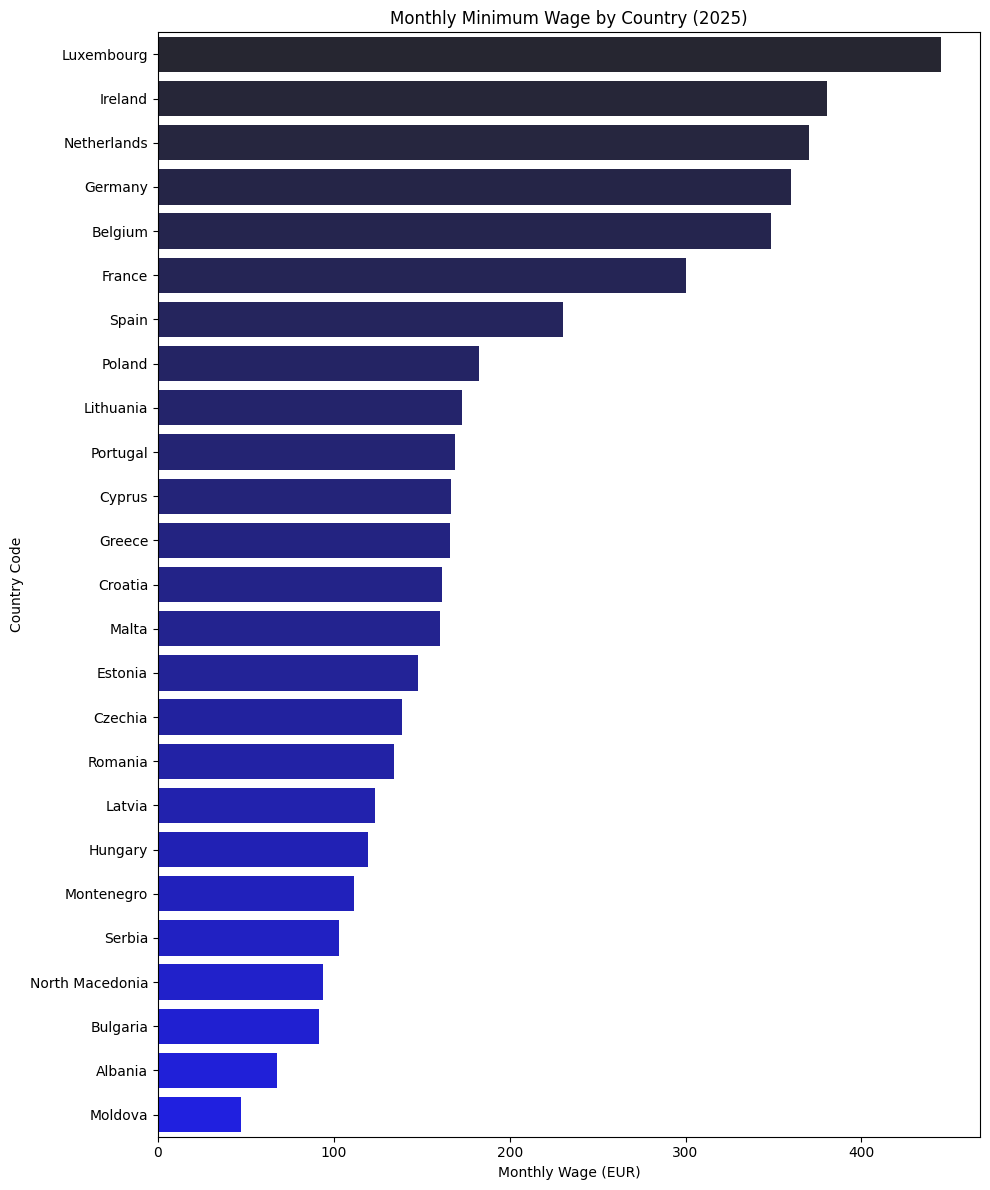

In [28]:
plt.figure(figsize=(10, 12))
df_sorted = df_2025.sort_values('monthly_wage', ascending=False)
sns.barplot(data=df_sorted, y='country', x='monthly_wage', hue= 'country', palette='dark:blue', legend=False)
plt.title('Monthly Minimum Wage by Country (2025)')
plt.xlabel('Monthly Wage (EUR)')
plt.ylabel('Country Code')
plt.tight_layout()
plt.show()

In [30]:
# Export DataFrame with country and monthly_wage columns to CSV
df_2025[['country', 'monthly_wage']].to_csv('monthly_wage_by_country.csv', index=False)

In [31]:
df_2025[['geo', 'monthly_wage']].to_csv('monthly_wage_by_countryCode.csv', index=False)